In [1]:
import numpy as np  
from sklearn.linear_model import LinearRegression
import xarray as xr
from metpy.constants import g, omega as om, Re as a
from metpy.units import units

# import for plots
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

import metpy.calc as mpcalc
from metpy.units import units
from netCDF4 import num2date

In [2]:
#Upload MPI DJF mean prcipitaiton data from the chinook directory - Simulation
dir = '/chinook/dallmann/Simulation/MPI/precip/'
fn_mpip = 'pr_MPI_2020-2064_DJFmean.nc'

data_mpi_pms = xr.open_dataset(dir+fn_mpip)

# Parse using MetPy, this allows us to use MetPy operations on it
data_mpi_pms = data_mpi_pms.metpy.parse_cf()



# Upload MPI DJF mean temperature data from the chinook directory
dir = '/chinook/dallmann/Simulation/MPI/temp/'
fn_mpit = 'tas_MPI_2020-2064_DJFmean.nc'

data_mpi_tms = xr.open_dataset(dir+fn_mpit)

#Parse using MetPy, so we can MetPy operations with it 
data_mpi_tms = data_mpi_tms.metpy.parse_cf()

Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable


In [3]:
# Upload HAD DJF mean precipiation data from the chinook directory

dir = '/chinook/dallmann/Simulation/HAD/precip/'
fn_hadp = 'pr_HAD_2015-2069_DJFmean.nc'


data_had_pms = xr.open_dataset(dir+fn_hadp)

# Parse using MetPy, so we can use MetPy operations with it
data_had_pms = data_had_pms.metpy.parse_cf()


# Upload HAD DJF mean temperature data from the chinook directory

dir = '/chinook/dallmann/Simulation/HAD/temp/'
fn_hadt = 'tas_HAD_2015-2069_DJFmean.nc'


data_had_tms = xr.open_dataset(dir+fn_hadt)

# Parse using MetPy, so we can use MetPy operations with it
data_had_tms = data_had_tms.metpy.parse_cf()

Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable


In [4]:
#Upload MPI DJF mean prcipitaiton data from the chinook directory - Historical 
dir = '/chinook/dallmann/MPI/precip/'
fn_mpip = 'pr_MPI_1950-2014_DJFmean.nc'

data_mpi_pmh = xr.open_dataset(dir+fn_mpip)

# Parse using MetPy, this allows us to use MetPy operations on it
data_mpi_pmh = data_mpi_pmh.metpy.parse_cf()



# Upload MPI DJF mean temperature data from the chinook directory
dir = '/chinook/dallmann/MPI/'
fn_mpit = 'tas_MPI_1950-2014_DJFmean.nc'

data_mpi_tmh = xr.open_dataset(dir+fn_mpit)

#Parse using MetPy, so we can MetPy operations with it 
data_mpi_tmh = data_mpi_tmh.metpy.parse_cf()

Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable


In [5]:
# Upload HAD DJF mean precipiation data from the chinook directory - Historical 

dir = '/chinook/dallmann/HAD/precip/'
fn_hadp = 'HAD_precip_1950-2014_DJFmean.nc'


data_had_pmh = xr.open_dataset(dir+fn_hadp)

# Parse using MetPy, so we can use MetPy operations with it
data_had_pmh = data_had_pmh.metpy.parse_cf()


# Upload HAD DJF mean temperature data from the chinook directory

dir = '/chinook/dallmann/HAD/temp/'
fn_hadt = 'HAD_tas_1950-2014_DJFmean.nc'


data_had_tmh = xr.open_dataset(dir+fn_hadt)

# Parse using MetPy, so we can use MetPy operations with it
data_had_tmh = data_had_tmh.metpy.parse_cf()

Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable


In [6]:
# Fix the time for HAD - Simulation

data_had_pms_new = data_had_pms

data_had_pms_new['time'] = data_had_pms.indexes['time'].to_datetimeindex(unsafe=True)
data_had_pms_new

data_had_tms_new = data_had_tms

data_had_tms_new['time'] = data_had_tms.indexes['time'].to_datetimeindex(unsafe=True)
data_had_tms_new

# Fix the time for HAD - Historcial

data_had_pmh_new = data_had_pmh
data_had_pmh_new['time'] = data_had_pmh.indexes['time'].to_datetimeindex(unsafe=True)

data_had_pmh_new

data_had_tmh_new = data_had_tmh
data_had_tmh_new['time'] = data_had_tmh.indexes['time'].to_datetimeindex(unsafe=True)

data_had_tmh_new


<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 324, lon: 432, time: 65)
Coordinates:
  * lon        (lon) float64 0.4167 1.25 2.083 2.917 ... 357.1 357.9 358.7 359.6
    height     float64 1.5
  * lat        (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * time       (time) datetime64[ns] 1949-12-01 1950-11-16 ... 2013-10-16
    crs        object Projection: latitude_longitude
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    time_bnds  (time, bnds) object ...
    tas        (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.7.2 (http://m...
    history:                   Sat Oct 24 17:25:57 2020: cdo yearmean -selmon...
    source:                    HadGEM3-GC31-MM (2016): \naerosol: UKCA-GLOMAP...
    institution:               Met Office Hadley Centre, Fitzroy Road, Exeter...
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             standard
    branch_time_in_child:      0.0
    branch_time_in_parent:     0.0
    creation_date:             2019-09-23T15:14:51Z
    cv_version:                6.2.37.5
    data_specs_version:        01.00.29
    experiment:                all-forcing simulation of the recent past
    experiment_id:             historical
    external_variables:        areacella
    forcing_index:             3
    frequency:                 year
    further_info_url:          https://furtherinfo.es-doc.org/CMIP6.MOHC.HadG...
    grid:                      Native N216 grid; 432 x 324 longitude/latitude
    grid_label:                gn
    initialization_index:      1
    institution_id:            MOHC
    mip_era:                   CMIP6
    mo_runid:                  u-bf351
    nominal_resolution:        100 km
    parent_activity_id:        CMIP
    parent_experiment_id:      piControl
    parent_mip_era:            CMIP6
    parent_source_id:          HadGEM3-GC31-MM
    parent_time_units:         days since 1850-01-01-00-00-00
    parent_variant_label:      r1i1p1f1
    physics_index:             1
    product:                   model-output
    realization_index:         1
    realm:                     atmos
    source_id:                 HadGEM3-GC31-MM
    source_type:               AOGCM AER
    sub_experiment:            none
    sub_experiment_id:         none
    table_id:                  Amon
    table_info:                Creation Date:(13 December 2018) MD5:f0588f7f5...
    title:                     HadGEM3-GC31-MM output prepared for CMIP6
    tracking_id:               hdl:21.14100/c95e0093-7db8-4772-81d4-03880bb8570c
    variable_id:               tas
    variable_name:             tas
    variant_label:             r1i1p1f3
    license:                   CMIP6 model data produced by the Met Office Ha...
    cmor_version:              3.4.0
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.7.2 (http://m...

In [7]:
# Assign variables to MPI precipitation and temperature - Simulation
time_mpi_pms = data_mpi_pms['time']
lat_mpi_pms = data_mpi_pms['lat']
lon_mpi_pms = data_mpi_pms['lon']

time_mpi_tms = data_mpi_tms['time']
lat_mpi_tms = data_mpi_tms['lat']
lon_mpi_tms = data_mpi_tms['lon']

pr_mpi_sim = data_mpi_pms['pr']
temp_mpi_sim = data_mpi_tms['tas']

# Assign variables to HAD precipitation and temperature - Simulation
time_had_pms = data_had_pms['time']
lat_had_pms = data_had_pms['lat']
lon_had_pms = data_had_pms['lon']

time_had_tms = data_had_tms['time']
lat_had_tms = data_had_tms['lat']
lon_had_tms = data_had_tms['lon']

pr_had_sim = data_had_pms['pr']
temp_had_sim = data_had_tms['tas']

In [8]:
# Assign variables to MPI precipitation and temperature - Historical 

time_mpi_pmh = data_mpi_pmh['time']
lat_mpi_pmh = data_mpi_pmh['lat']
lon_mpi_pmh = data_mpi_pmh['lon']

time_mpi_tmh = data_mpi_tmh['time']
lat_mpi_tmh = data_mpi_tmh['lat']
lon_mpi_tmh = data_mpi_tmh['lon']

pr_mpi_his = data_mpi_pmh['pr']
temp_mpi_his = data_mpi_tmh['tas']

# Assign variables to HAD precipitation and temperature - Historical 

time_had_pmh = data_had_pmh['time']
lat_had_pmh = data_had_pmh['lat']
lon_had_pmh = data_had_pmh['lon']

time_had_tmh = data_had_tmh['time']
lat_had_tmh = data_had_tmh['lat']
lon_had_tmh = data_had_tmh['lon']

pr_had_his = data_had_pmh['pr']
temp_had_his = data_had_tmh['tas']

In [9]:
# Calculate units for Simulations
pr_mpi_sim_unit = pr_mpi_sim*86400*31
temp_mpi_sim_unit = temp_mpi_sim-273.15

pr_had_sim_unit = pr_had_sim*86400*31
temp_had_sim_unit = temp_had_sim-273.15

# Calculate units for Historical

pr_mpi_his_unit = pr_mpi_his*86400*31
temp_mpi_his_unit = temp_mpi_his-273.15

pr_had_his_unit = pr_had_his*86400*31
temp_had_his_unit = temp_had_his-273.15


In [10]:
#Simluation:

pr_mpi_sim_plot = pr_mpi_sim_unit.sel(lat=34.0522, lon=241.7563, time = time_mpi_pms, method='nearest').compute()
temp_mpi_sim_plot = temp_mpi_sim_unit.sel(lat=34.0522, lon=241.7563, time = time_mpi_tms, method='nearest').compute()

pr_had_sim_plot = pr_had_sim_unit.sel(lat=34.0522, lon=241.7563, time = time_had_pms, method='nearest').compute()
temp_had_sim_plot = temp_had_sim_unit.sel(lat=34.0522, lon=241.7563, time = time_had_tms, method='nearest').compute()

#Historical

pr_mpi_his_plot = pr_mpi_his_unit.sel(lat=34.0522, lon=241.7563, time = time_mpi_pmh, method='nearest').compute()
temp_mpi_his_plot = temp_mpi_his_unit.sel(lat=34.0522, lon=241.7563, time = time_mpi_tmh, method='nearest').compute()

pr_had_his_plot = pr_had_his_unit.sel(lat=34.0522, lon=241.7563, time = time_had_pmh, method='nearest').compute()
temp_had_his_plot = temp_had_his_unit.sel(lat=34.0522, lon=241.7563, time = time_had_tmh, method='nearest').compute()

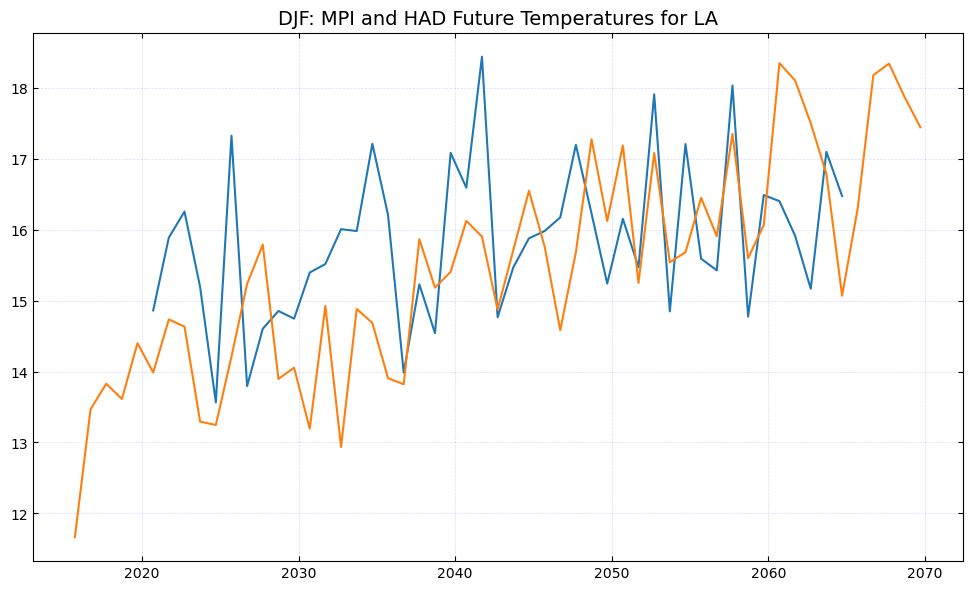

In [13]:
plt.figure(figsize=(12,7), dpi=100)
plt.plot(time_mpi_tms, temp_mpi_sim_plot)
plt.plot(time_had_tms, temp_had_sim_plot)

# 1. Adjust x axis Ticks
# plt.xticks(ticks=np.arange(0, 440/57.2985, 90/57.2985), fontsize=12, rotation=30, ha='center', va='top')  # 1 radian = 57.2985 degrees

# 2. Tick Parameters
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major', grid_color='blue')

# 3. Format tick labels to convert radians to degrees

plt.grid(linestyle='--', linewidth=0.5, alpha=0.15)
plt.title('DJF: MPI and HAD Future Temperatures for LA', fontsize=14)
plt.show()